In [110]:
%run "../PyUtils/common.ipynb"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
fileName="../data/champagne-sales.xlsx"  # Data is located in analysis1.xlsx
dfOriginal = LoadDataSet(fileName, columns=None, checkForDateTime=False);
dfL = dfOriginal
dfL.Month= dfL.Month.apply(dateutil.parser.parse)
dfL['Month'] = pd.to_datetime(dfL.Month)
dfL.columns=(['date', 'sales'])
tt = dfL.sales

In [256]:
%%R -i tt -w 1200 -h 500 -u px  # Pass in Pandas Dataframe into R
require(ggplot2)
require(gridExtra)
require("TTR")
require("forecast")
require("arima")

library("forecast")


plotForecastErrors <- function(forecasterrors)
{
    # make a histogram of the forecast errors:
    mybinsize <- IQR(forecasterrors)/4
    mysd <- sd(forecasterrors)
    mymin <- min(forecasterrors) - mysd*5
    mymax <- max(forecasterrors) + mysd*3
    # generate normally distributed data with mean 0 and standard deviation mysd
    mynorm <- rnorm(10000, mean=0, sd=mysd)
    mymin2 <- min(mynorm)
    mymax2 <- max(mynorm)
    if (mymin2 < mymin) { mymin <- mymin2 }
    if (mymax2 > mymax) { mymax <- mymax2 }
    # make a red histogram of the forecast errors, with the normally distributed data overlaid:
    mybins <- seq(mymin, mymax, mybinsize)
    hist(forecasterrors, col="red", freq=FALSE, breaks=mybins)

    # freq=FALSE ensures the area under the histogram = 1
    # generate normally distributed data with mean 0 and standard deviation mysd
    myhist <- hist(mynorm, plot=FALSE, breaks=mybins)
    # plot the normal curve as a blue line on top of the histogram of forecast errors:
    points(myhist$mids, myhist$density, type="l", col="blue", lwd=2)
}


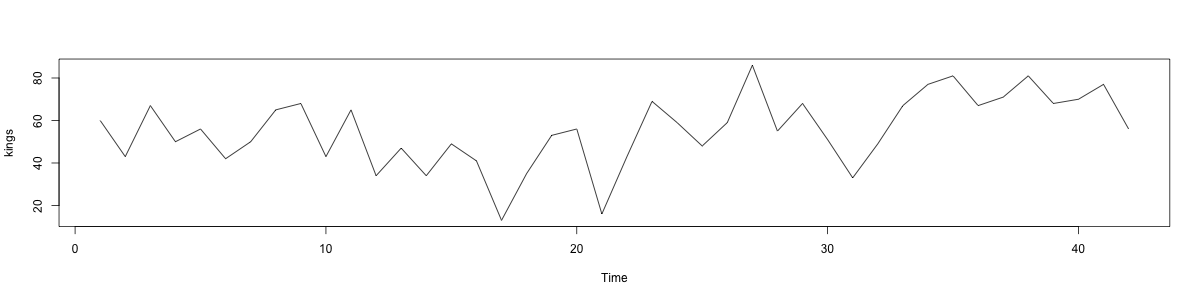

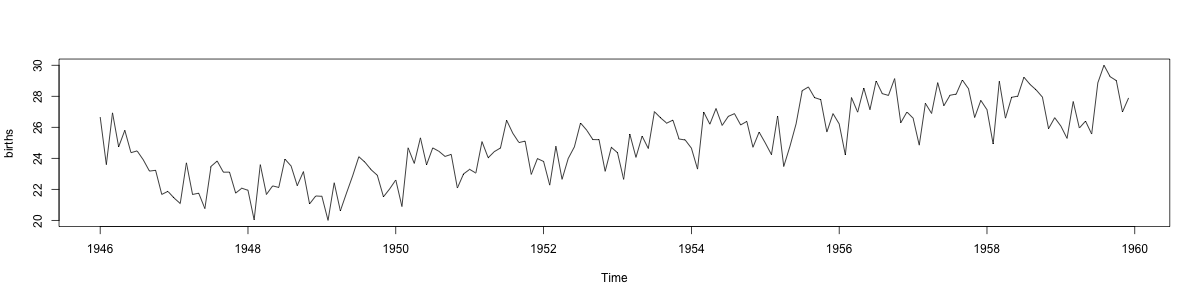

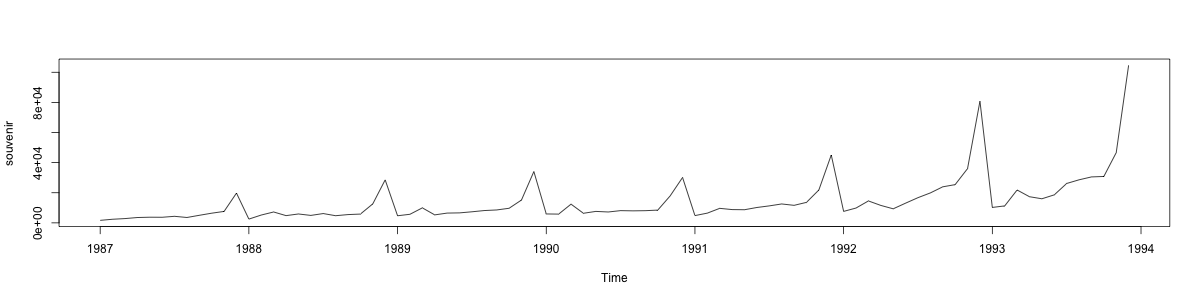

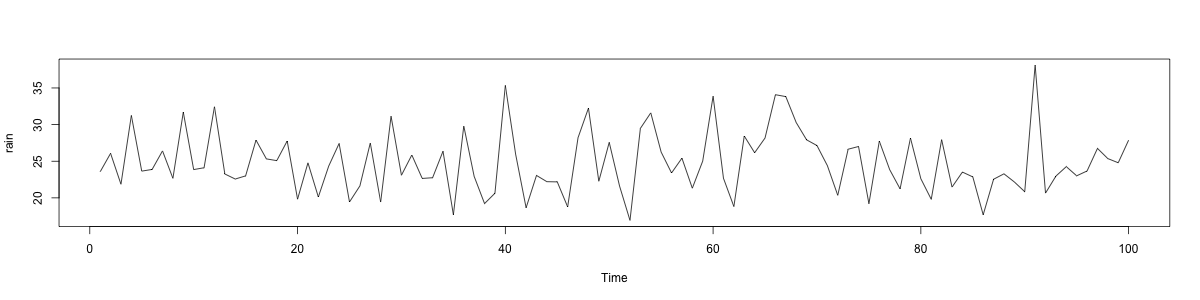

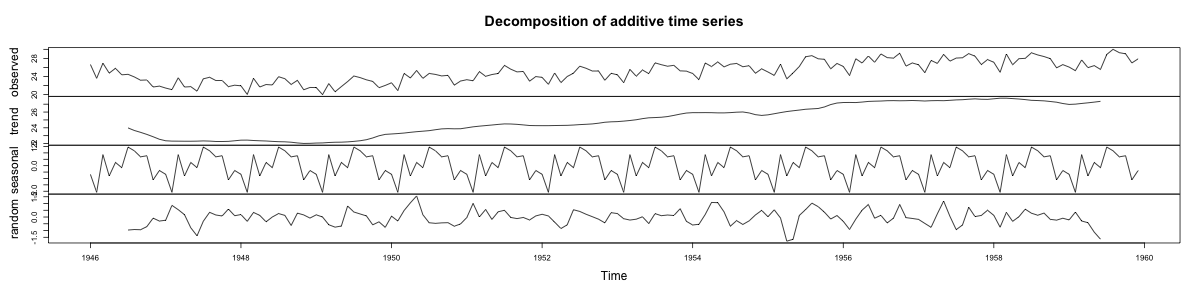

In [203]:
%%R -i tt -o kings -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# Exponential smotthing 
kings  = scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
kings = ts(kings)

births = scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")
births = ts(births, frequency=12, start=c(1946,1))

souvenir = scan("http://robjhyndman.com/tsdldata/data/fancy.dat")
souvenir = ts(souvenir, frequency=12, start=c(1987,1))


plot(kings)
plot(births)
plot(souvenir)
# 1. observe and check if it can use additive or multiplicative model
# 1a. You may take a log to convert multiplicative  model to additive ;
#     l = log(souvenir)
# 2. Apply SMA to smooth - SMA(births, n =8) 
#      s = SMA(kings, n=4)
# 
dbirths = decompose(births)
plot(dbirths)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819
[1] 1828.855


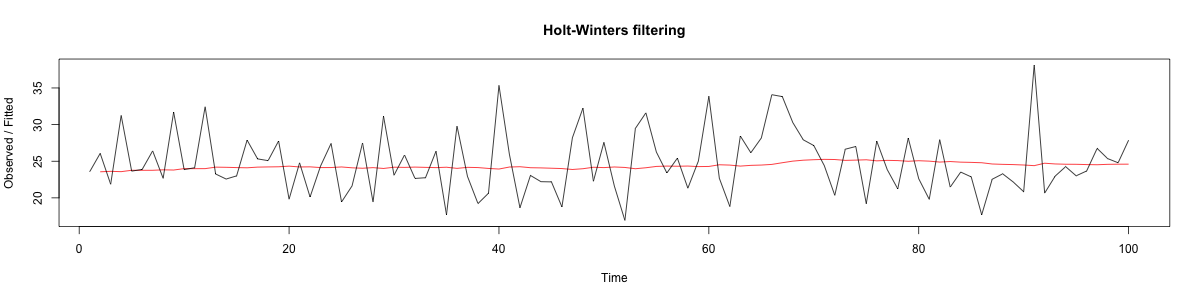

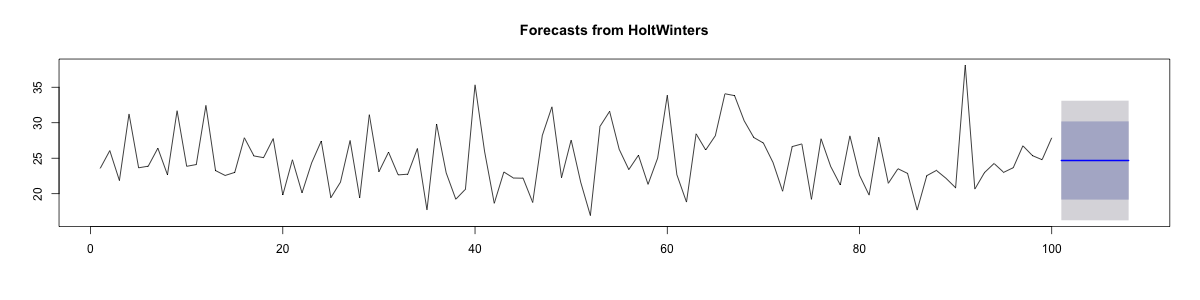

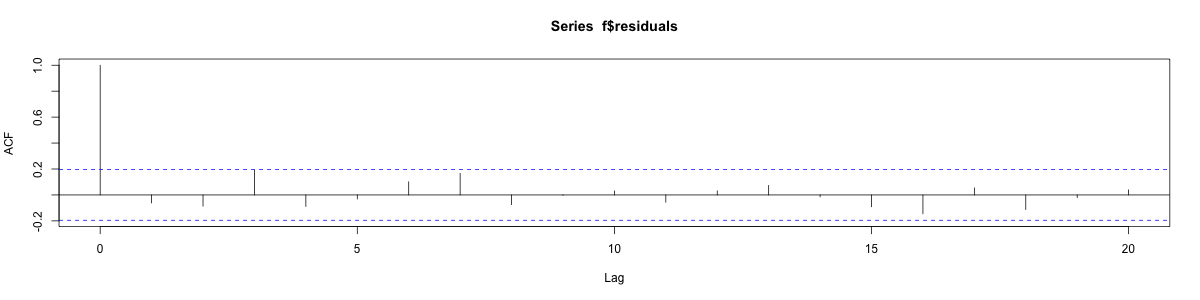

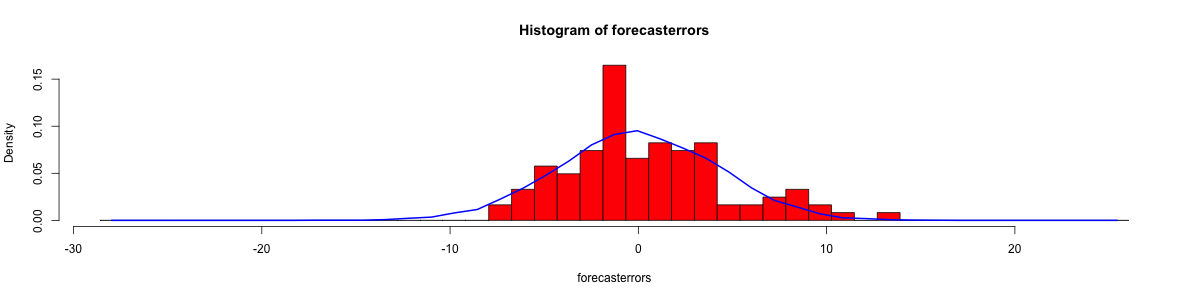

In [258]:
%%R -i tt -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# Smoothing
data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
dts = ts(data)

m = HoltWinters(dts, beta=FALSE, gamma=FALSE)
print(m)
print( m$SSE )

# f$fitted gives the fitted values
plot(m)
#f = forecast.HoltWinters(m, h=8)
f = forecast.HoltWinters(m, h=8)
plot(f)

# Make sure residuals are not correlated
f$residuals[is.na(f$residuals)] = 0
acf(f$residuals, lag.max=20, plot=TRUE)

# Test non zero correlation at lag 20
Box.test(f$residuals, lag=20, type="Ljung-Box")

# PLot residuals and test if is normally distributed with mean zero
plotForecastErrors(f$residuals)

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = dts, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8383481
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.308585
b   5.690464
[1] 16954.18


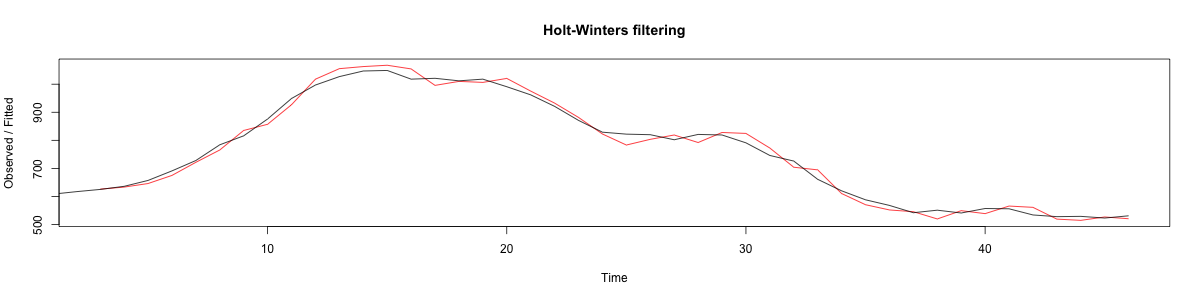

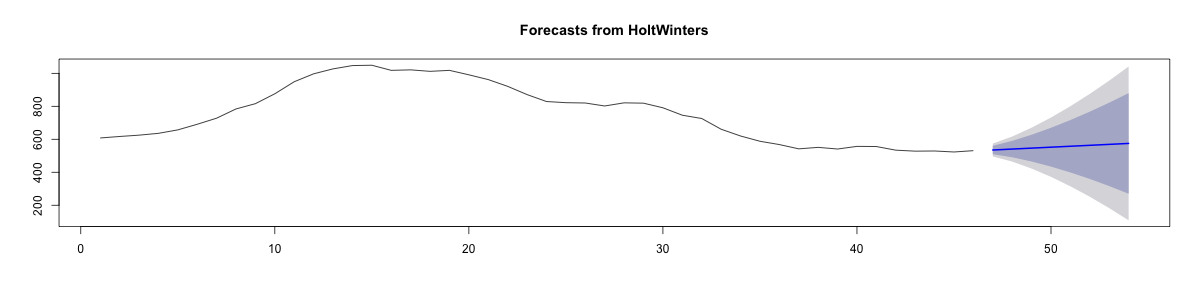

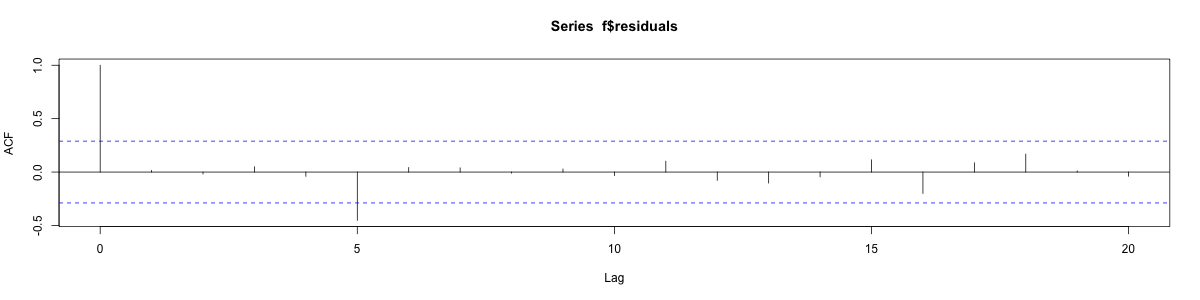

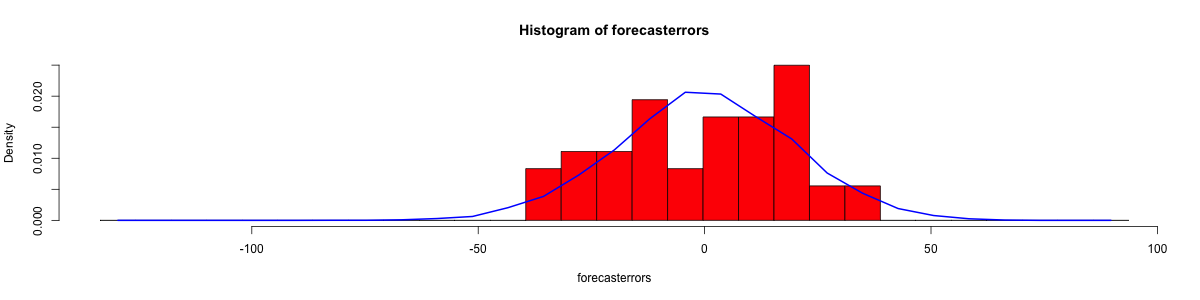

In [267]:
%%R -i tt -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# Smoothing
data <- scan("http://robjhyndman.com/tsdldata/roberts/skirts.dat",skip=5)
dts = ts(data)

m = HoltWinters(dts, gamma=FALSE)
print(m)
print( m$SSE )

# f$fitted gives the fitted values
plot(m)
f = forecast.HoltWinters(m, h=8)
plot(f)

# Make sure residuals are not correlated
f$residuals[is.na(f$residuals)] = 0
acf(f$residuals, lag.max=20, plot=TRUE)

# Test non zero correlation at lag 20
Box.test(f$residuals, lag=20, type="Ljung-Box")

# PLot residuals and test if is normally distributed with mean zero
plotForecastErrors(f$residuals)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = dts)

Smoothing parameters:
 alpha: 0.413418
 beta : 0
 gamma: 0.9561275

Coefficients:
           [,1]
a   10.37661961
b    0.02996319
s1  -0.80952063
s2  -0.60576477
s3   0.01103238
s4  -0.24160551
s5  -0.35933517
s6  -0.18076683
s7   0.07788605
s8   0.10147055
s9   0.09649353
s10  0.05197826
s11  0.41793637
s12  1.18088423
[1] 2.011491


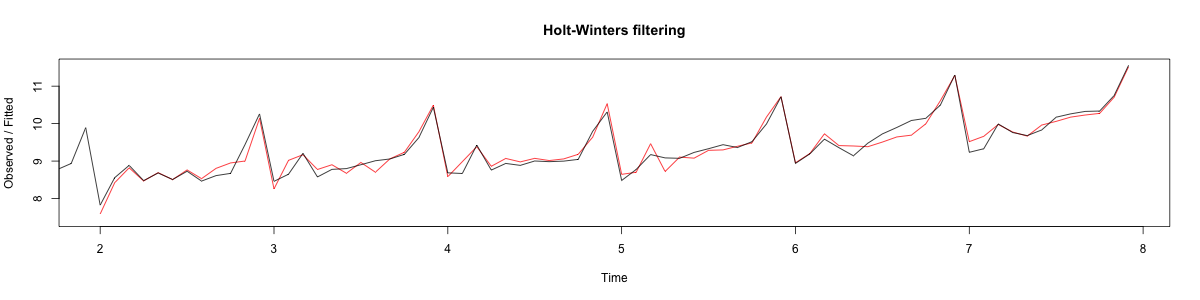

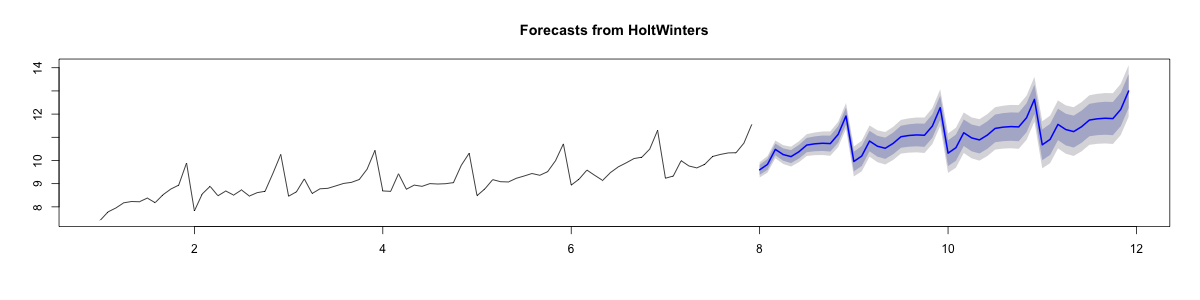

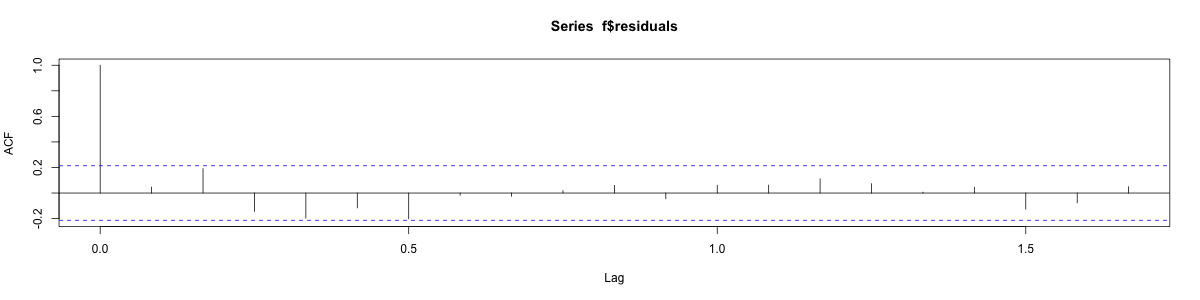

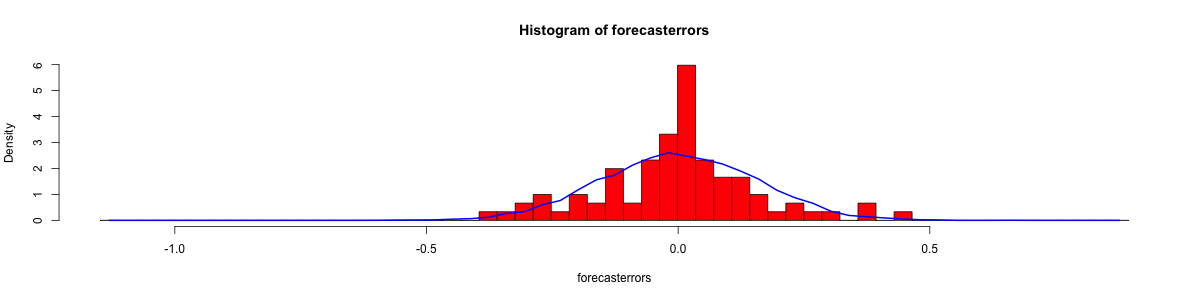

In [272]:
%%R -i tt -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# Smoothing - Sovenir DATA - by inspecting - first we need to make data stationary so apply log to it
data <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")
dts = ts(log(data), frequency=12)

m = HoltWinters(dts)
print(m)
print( m$SSE )

# f$fitted gives the fitted values
plot(m)
f = forecast.HoltWinters(m, h=48)
plot(f)

# Make sure residuals are not correlated
f$residuals[is.na(f$residuals)] = 0

acf(f$residuals, lag.max=20, plot=TRUE)

# Test non zero correlation at lag 20
Box.test(f$residuals, lag=20, type="Ljung-Box")

# PLot residuals and test if is normally distributed with mean zero
plotForecastErrors(f$residuals)

## ARIMA


Autocorrelations of series 'dif', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.360 -0.162 -0.050  0.227 -0.042 -0.181  0.095  0.064 -0.116 -0.071 
    11     12     13     14     15     16     17     18     19     20 
 0.206 -0.017 -0.212  0.130  0.114 -0.009 -0.192  0.072  0.113 -0.093 

Partial autocorrelations of series 'dif', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.360 -0.335 -0.321  0.005  0.025 -0.144 -0.022 -0.007 -0.143 -0.167  0.065 
    12     13     14     15     16     17     18     19     20 
 0.034 -0.161  0.036  0.066  0.081 -0.005 -0.027 -0.006 -0.037 
Series: dts 
ARIMA(0,1,1)                    

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 236.2:  log likelihood=-170.06
AIC=344.13   AICc=344.44   BIC=347.56

	Box-Ljung test

data:  f$residuals
X-squared = 13.584, df = 20, p-value = 0.8509



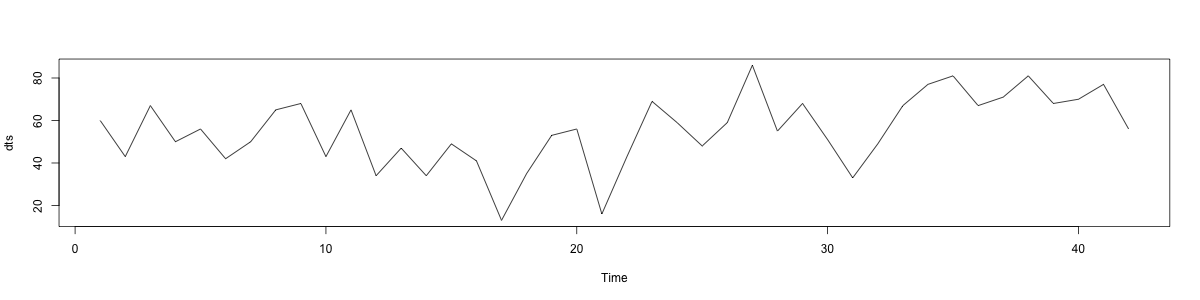

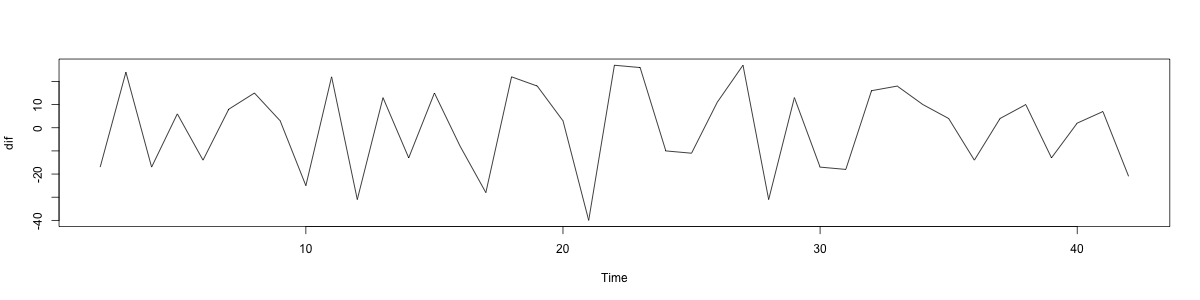

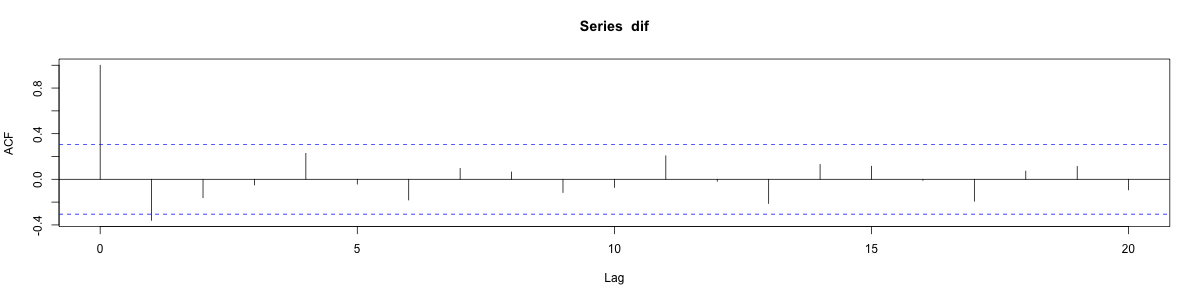

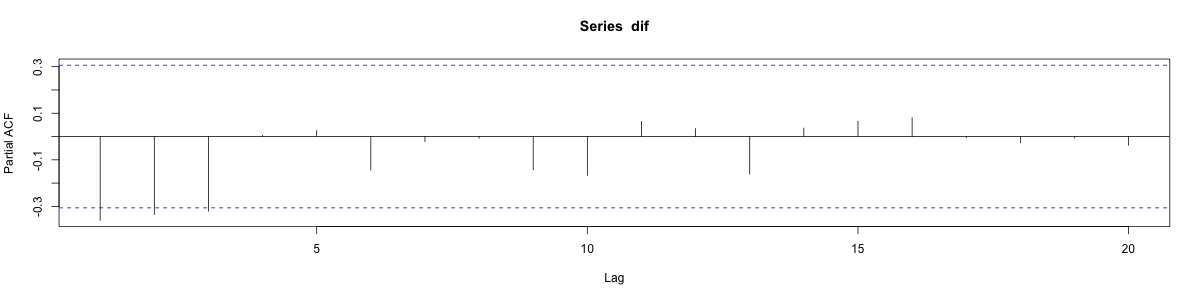

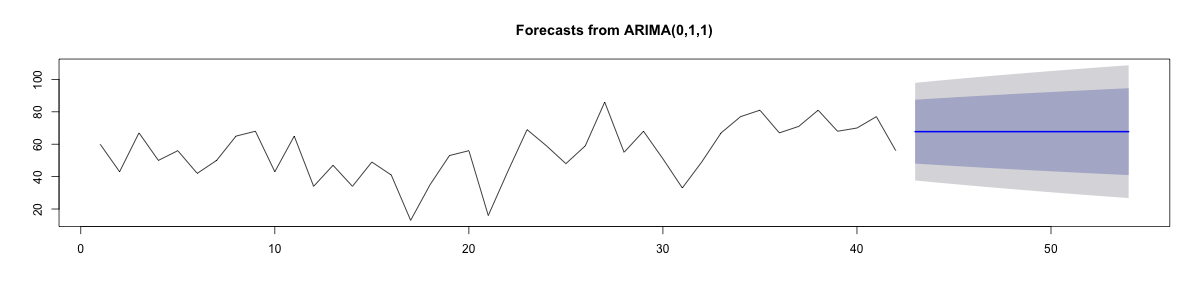

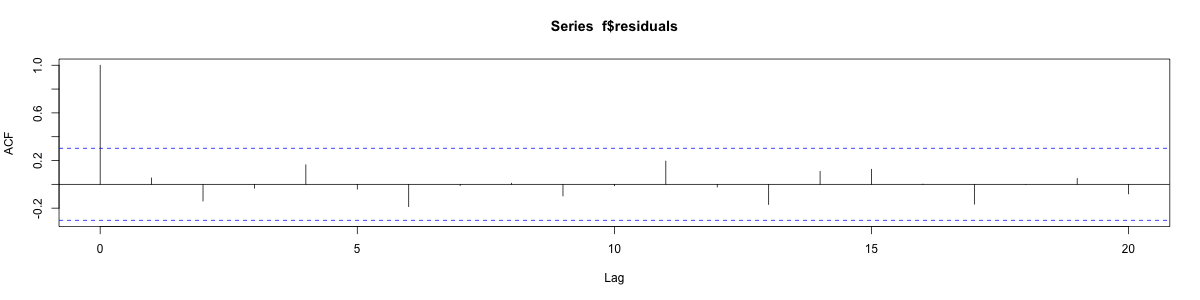

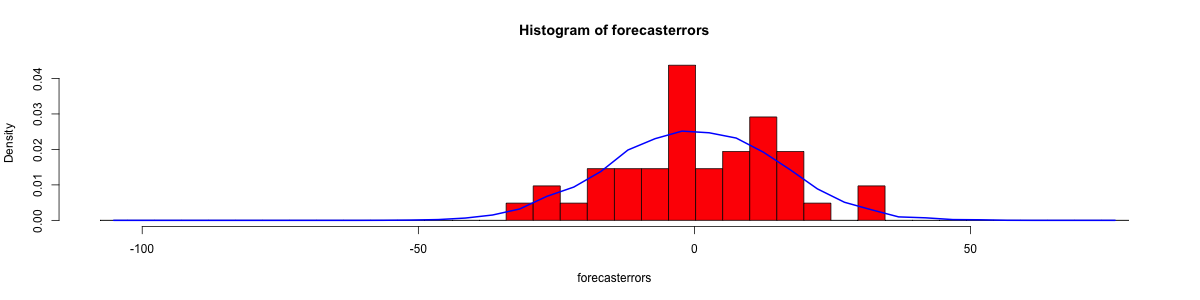

In [299]:
%%R -i tt -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# ARIMA
data <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
dts = ts(data)

dif = diff(dts, differences=1)
plot(dts)
plot(dif)
acf(dif, lag.max=20)
print (acf(dif, lag.max=20, plot=FALSE))
# Notice above auto correlation aftwe lag 1 is within 0.3
pacf(dif, lag.max=20)
print(pacf(dif, lag.max=20, plot=FALSE))
# Partial auto correlation after 3 is quite good
ar = auto.arima(dts)
print (ar)
f = forecast.Arima(ar, h=12)
plot(f)

# You can do the following too
#ar = arima(dts, order=c(0,1,1))

# Make sure residuals are not correlated
f$residuals[is.na(f$residuals)] = 0
acf(f$residuals, lag.max=20, plot=TRUE)

# Test non zero correlation at lag 20
print (Box.test(f$residuals, lag=20, type="Ljung-Box"))

# PLot residuals and test if is normally distributed with mean zero
plotForecastErrors(f$residuals)



Autocorrelations of series 'dif', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.060 -0.119 -0.142 -0.129 -0.005 -0.071  0.024  0.031 -0.029  0.015 
    11     12     13     14     15     16     17     18     19     20 
-0.038 -0.049  0.068  0.037  0.011  0.013 -0.086 -0.086  0.010  0.146 

Partial autocorrelations of series 'dif', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.060 -0.123 -0.161 -0.174 -0.079 -0.160 -0.074 -0.058 -0.104 -0.060 -0.097 
    12     13     14     15     16     17     18     19     20 
-0.131 -0.017 -0.027 -0.048 -0.014 -0.108 -0.154 -0.076  0.058 
Series: dts 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2  intercept
      0.7533  -0.1268    57.5274
s.e.  0.0457   0.0458     8.5958

sigma^2 estimated as 4901:  log likelihood=-2662.54
AIC=5333.09   AICc=5333.17   BIC=5349.7

	Box-Ljung test

data:  f$residuals
X-squared = 24.364, df = 20, p-val

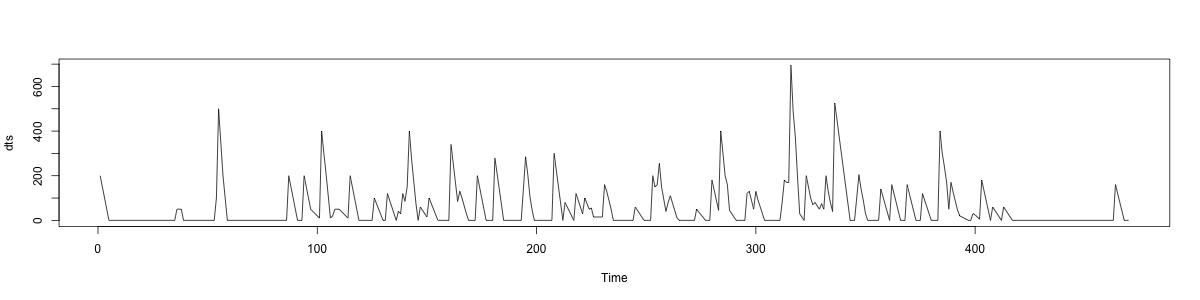

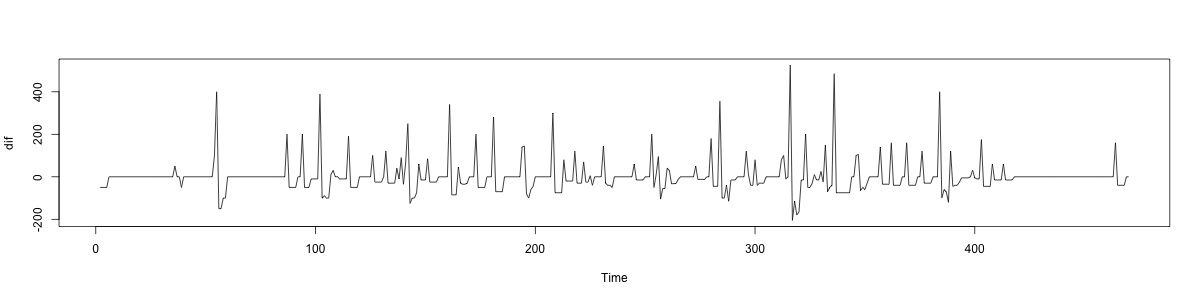

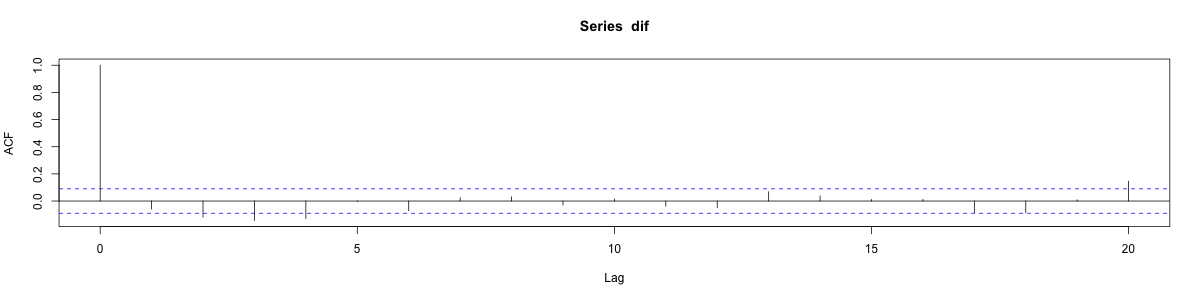

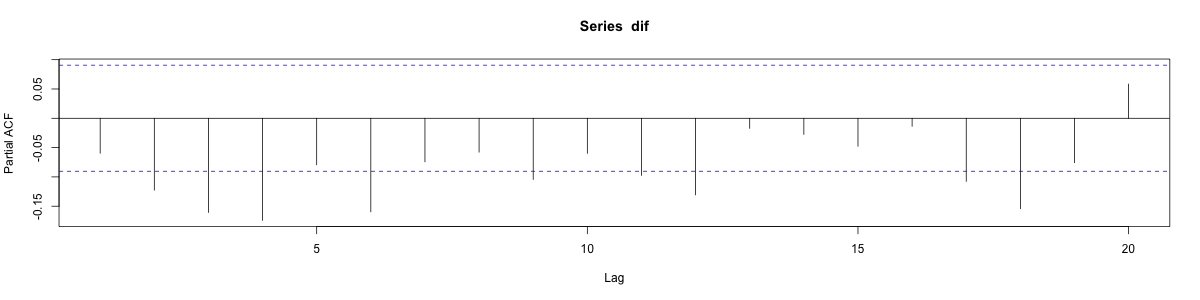

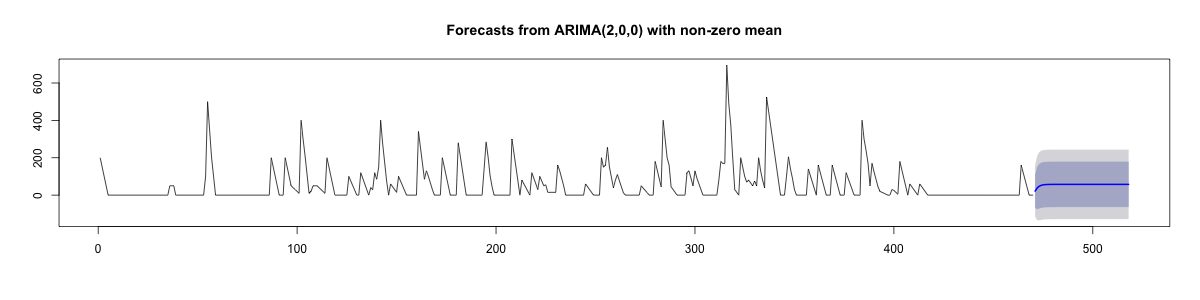

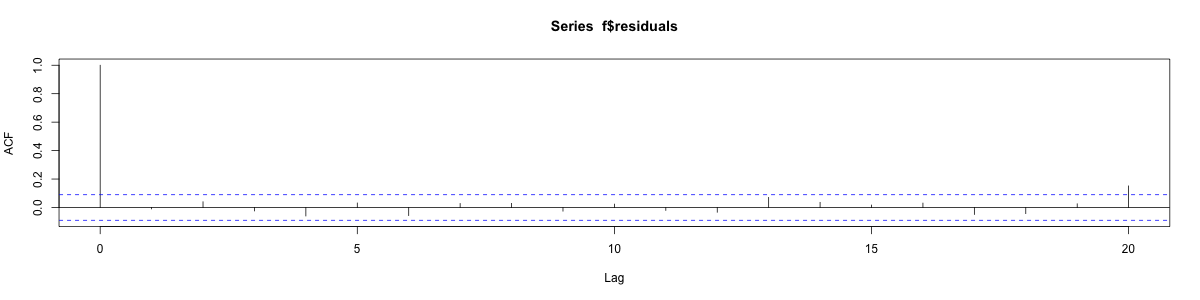

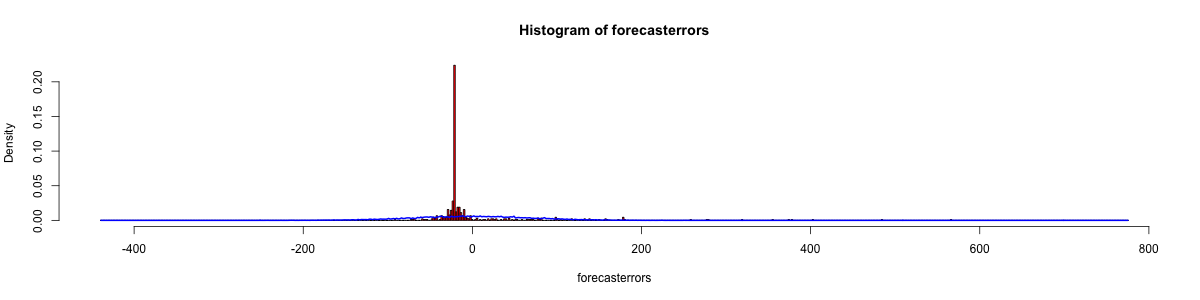

In [300]:
%%R -i tt -w 1200 -h 300 -u px  # Pass in Pandas Dataframe into R
# ARIMA
# Fidn out abvout UNIT ROOT Test to check for staionarity and find diffs 
data <- scan("http://robjhyndman.com/tsdldata/annual/dvi.dat", skip=1)
dts = ts(data)

dif = diff(dts, differences=1)
plot(dts)
plot(dif)
acf(dif, lag.max=20)
print (acf(dif, lag.max=20, plot=FALSE))
# Notice above auto correlation aftwe lag 1 is within 0.3
pacf(dif, lag.max=20)
print(pacf(dif, lag.max=20, plot=FALSE))
# Partial auto correlation after 3 is quite good
ar = auto.arima(dts, ic="bic")
print (ar)
f = forecast.Arima(ar, h=48)
plot(f)

# Make sure residuals are not correlated
f$residuals[is.na(f$residuals)] = 0
acf(f$residuals, lag.max=20, plot=TRUE)

# Test non zero correlation at lag 20
print (Box.test(f$residuals, lag=20, type="Ljung-Box") )

# PLot residuals and test if is normally distributed with mean zero
plotForecastErrors(f$residuals)
print ( mean(f$residuals))